In [0]:
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [0]:
data=pd.read_csv("/content/rainfall in india 1901-2015.csv")

data.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [0]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [0]:
print(data.head())

                 SUBDIVISION  YEAR   JAN  ...  Mar-May  Jun-Sep  Oct-Dec
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2  ...    560.3   1696.3    980.3
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  ...    458.3   2185.9    716.7
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  ...    236.1   1874.0    690.6
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4  ...    506.9   1977.6    571.0
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3  ...    309.7   1624.9    630.8

[5 rows x 19 columns]


In [0]:
print(data.isnull().sum())

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64


In [0]:
data=data.fillna(np.mean(data))
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [0]:
np.mean(data)

YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

In [0]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [0]:
data.shape

(4116, 19)

In [0]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4116 non-null float64
FEB            4116 non-null float64
MAR            4116 non-null float64
APR            4116 non-null float64
MAY            4116 non-null float64
JUN            4116 non-null float64
JUL            4116 non-null float64
AUG            4116 non-null float64
SEP            4116 non-null float64
OCT            4116 non-null float64
NOV            4116 non-null float64
DEC            4116 non-null float64
ANNUAL         4116 non-null float64
Jan-Feb        4116 non-null float64
Mar-May        4116 non-null float64
Jun-Sep        4116 non-null float64
Oct-Dec        4116 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.1+ KB


In [0]:
data.groupby('SUBDIVISION').size()

SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             110
ARUNACHAL PRADESH                      97
ASSAM & MEGHALAYA                     115
BIHAR                                 115
CHHATTISGARH                          115
COASTAL ANDHRA PRADESH                115
COASTAL KARNATAKA                     115
EAST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
EAST UTTAR PRADESH                    115
GANGETIC WEST BENGAL                  115
GUJARAT REGION                        115
HARYANA DELHI & CHANDIGARH            115
HIMACHAL PRADESH                      115
JAMMU & KASHMIR                       115
JHARKHAND                             115
KERALA                                115
KONKAN & GOA                          115
LAKSHADWEEP                           114
MADHYA MAHARASHTRA                    115
MATATHWADA                            115
NAGA MANI MIZO TRIPURA                115
NORTH INTERIOR KARNATAKA              115
ORISSA                

In [0]:
print("Co-Variance = ")
data.cov()

Co-Variance = 


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
YEAR,1098.319127,-62.525455,-26.333846,31.608776,17.985597,14.668989,-105.646427,-144.815256,40.268753,-29.893921,7.922814,-42.624271,-26.804831,-239.492392,-87.619668,70.841300,-220.389375,-56.011703
JAN,-62.525455,1126.880700,549.299548,627.375837,475.344306,535.377197,-265.334667,-465.128448,75.536029,110.216877,41.252990,154.517515,311.215537,3182.200682,1675.112786,1632.972340,-537.708253,507.405040
FEB,-26.333846,549.299548,1288.551221,974.300386,892.111938,896.648721,283.409286,156.524886,488.385320,388.537697,-16.324506,-57.342083,200.895960,5831.636967,1837.200844,2754.690073,1291.239831,130.324910
MAR,31.608776,627.375837,974.300386,2201.972143,1766.214414,2094.072720,1819.002965,1227.377060,1195.021166,1133.597551,401.044464,28.337749,270.309451,13551.372253,1601.188055,6057.993672,5354.542547,702.446620
APR,17.985597,475.344306,892.111938,1766.214414,4596.594854,5433.121872,7239.347234,4883.946095,3275.971621,3507.500523,2478.380760,767.024409,379.022457,34892.913572,1367.102182,11751.856167,18800.990715,3611.891111
MAY,14.668989,535.377197,896.648721,2094.072720,5433.121872,15175.769642,16377.076471,10998.210205,7649.136573,8195.841594,6466.235613,2957.825540,1297.885757,76832.142562,1430.274263,22630.231857,43086.245286,10689.487044
JUN,-105.646427,-265.334667,283.409286,1819.002965,7239.347234,16377.076471,55022.202897,46742.156704,28995.034435,17494.413820,11407.373968,3683.106889,878.194764,186947.838753,14.101413,25297.228770,147777.656772,15929.294431
JUL,-144.815256,-465.128448,156.524886,1227.377060,4883.946095,10998.210205,46742.156704,72528.044881,34865.908024,18689.175537,8011.623303,787.996420,-221.331169,196502.700078,-304.676604,16923.240288,172787.647754,8543.095960
AUG,40.268753,75.536029,488.385320,1195.021166,3275.971621,7649.136573,28995.034435,34865.908024,35599.654379,12689.249607,4698.672264,225.143088,13.095578,128005.124370,568.034975,12061.613866,111996.536530,4889.354198
SEP,-29.893921,110.216877,388.537697,1133.597551,3507.500523,8195.841594,17494.413820,18689.175537,12689.249607,18308.685373,5160.065598,1423.645365,625.337757,86880.184870,497.514696,12753.170806,67119.849971,7199.381976


In [0]:
print("Co-Relation = ")
data.corr()

Co-Relation = 


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
YEAR,1.000000,-0.056202,-0.022136,0.020325,0.008005,0.003593,-0.013590,-0.016225,0.006440,-0.006666,0.002404,-0.018750,-0.019113,-0.008021,-0.044611,0.010630,-0.009408,-0.010140
JAN,-0.056202,1.000000,0.455847,0.398275,0.208858,0.129463,-0.033697,-0.051449,0.011926,0.024265,0.012359,0.067105,0.219077,0.105213,0.841989,0.241899,-0.022660,0.090685
FEB,-0.022136,0.455847,1.000000,0.578410,0.366564,0.202766,0.033658,0.016191,0.072109,0.079993,-0.004574,-0.023288,0.132250,0.180311,0.863589,0.381608,0.050887,0.021782
MAR,0.020325,0.398275,0.578410,1.000000,0.555162,0.362252,0.165256,0.097122,0.134973,0.178535,0.085951,0.008804,0.136122,0.320523,0.575755,0.641975,0.161425,0.089811
APR,0.008005,0.208858,0.366564,0.555162,1.000000,0.650513,0.455211,0.267485,0.256094,0.382341,0.367632,0.164933,0.132105,0.571217,0.340239,0.861953,0.392298,0.319622
MAY,0.003593,0.129463,0.202766,0.362252,0.650513,1.000000,0.566751,0.331508,0.329090,0.491688,0.527885,0.350037,0.248963,0.692228,0.195905,0.913500,0.494785,0.520597
JUN,-0.013590,-0.033697,0.033658,0.165256,0.455211,0.566751,1.000000,0.739923,0.655136,0.551191,0.489080,0.228909,0.088470,0.884572,0.001014,0.536289,0.891237,0.407425
JUL,-0.016225,-0.051449,0.016191,0.097122,0.267485,0.331508,0.739923,1.000000,0.686160,0.512872,0.299179,0.042657,-0.019421,0.809836,-0.019089,0.312482,0.907639,0.190319
AUG,0.006440,0.011926,0.072109,0.134973,0.256094,0.329090,0.655136,0.686160,1.000000,0.497032,0.250447,0.017396,0.001640,0.752985,0.050799,0.317891,0.839722,0.155471
SEP,-0.006666,0.024265,0.079993,0.178535,0.382341,0.491688,0.551191,0.512872,0.497032,1.000000,0.383522,0.153388,0.109209,0.712646,0.062041,0.468689,0.701740,0.319217


In [0]:
corr_cols=data.corr()['ANNUAL'].sort_values()[::-1]
corr_cols

ANNUAL     1.000000
Jun-Sep    0.939463
JUN        0.884572
JUL        0.809836
AUG        0.752985
SEP        0.712646
MAY        0.692228
Mar-May    0.691419
OCT        0.584567
APR        0.571217
Oct-Dec    0.527082
MAR        0.320523
NOV        0.306364
DEC        0.205874
FEB        0.180311
Jan-Feb    0.168805
JAN        0.105213
YEAR      -0.008021
Name: ANNUAL, dtype: float64

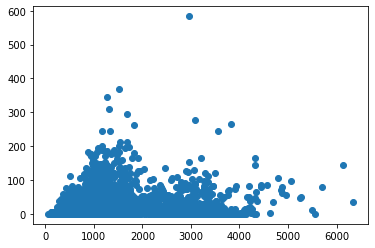

In [0]:
plt.scatter(data.ANNUAL,data.JAN)

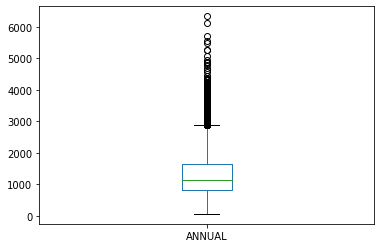

In [0]:
data['ANNUAL'].plot(kind='box',sharex=False,sharey=False)

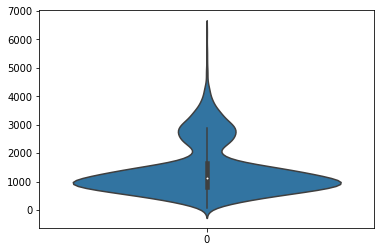

In [0]:

sb.violinplot(data=data['ANNUAL'])

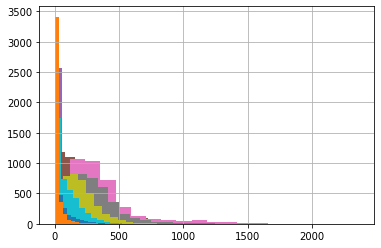

In [0]:
data['JAN'].hist(bins=20)
data['FEB'].hist(bins=20)
data['MAR'].hist(bins=20)
data['APR'].hist(bins=20)
data['MAY'].hist(bins=20)
data['JUN'].hist(bins=20)
data['JUL'].hist(bins=20)
data['AUG'].hist(bins=20)
data['SEP'].hist(bins=20)
data['OCT'].hist(bins=20)
data['NOV'].hist(bins=20)
data['DEC'].hist(bins=20)

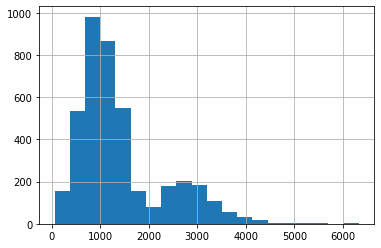

In [0]:
data['ANNUAL'].hist(bins=20)

In [0]:
d2=data.drop(['SUBDIVISION','YEAR','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'],axis=1)
k=((d2.head().sum()))
month=list(d2.head())
print("Months are: ",month)
print(k)
s=0
for i in d2.sum():
  s=s+i

print("Total recorded rainfall in these 12 months",s)
probability=list(k/s)
print(probability)

max_rainfall=max(probability)
for i in range(len(month)):
  if probability[i]==max_rainfall:
    print("Maximum Rainfall will be in the month of",month[i])
min_rainfall=min(probability)
for i in range(len(month)):
  if probability[i]==min_rainfall:
    print("Minimum Rainfall will be in the month of",month[i])


Months are:  ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
JAN      72.6
FEB     405.6
MAR      44.7
APR     232.6
MAY    1794.0
JUN    2658.3
JUL    2193.1
AUG    2052.1
SEP    2455.2
OCT    1249.8
NOV    1535.7
DEC     803.9
dtype: float64
Total recorded rainfall in these 12 months 5829542.827152476
[1.2453806782557342e-05, 6.957663954552696e-05, 7.667839713227454e-06, 3.9900212914915124e-05, 0.00030774282875906155, 0.00045600488388529176, 0.0003762044580554615, 0.00035201731265132127, 0.00042116510210103014, 0.0002143907399013797, 0.0002634340368591365, 0.00013790103681126512]
Maximum Rainfall will be in the month of JUN
Minimum Rainfall will be in the month of MAR


In [0]:
from sklearn import linear_model

y=data['ANNUAL']
x=data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,shuffle=False)

In [0]:
print("Train x shape",train_x.shape,"; Test_x",test_x.shape)
print("Train y shape",train_y.shape,"; Test_y",test_y.shape)

Train x shape (2881, 4) ; Test_x (1235, 4)
Train y shape (2881,) ; Test_y (1235,)


In [0]:
lm=linear_model.LinearRegression()
lm.fit(train_x,train_y)
pred=lm.predict(test_x)

In [0]:
print("Mean Squared Error =",mean_squared_error(test_y,pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(test_y,pred)))
print("Mean Absolute Error =",mean_absolute_error(test_y,pred))
print("r2_score =",r2_score(test_y,pred))

Mean Squared Error = 3326.41575354187
Root Mean Squared Error = 57.675087806971476
Mean Absolute Error = 10.953757241508555
r2_score = 0.9958637383726687


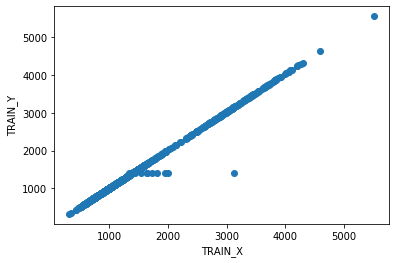

In [0]:
plt.scatter(pred,test_y)
plt.xlabel('TRAIN_X')
plt.ylabel('TRAIN_Y')
plt.show()

In [0]:
expected=[]
for i in test_y:
  if i>2000:
    expected.append("high")
  else:
    expected.append("low")
predicted=[]
for i in pred:
  if i>2000:
    predicted.append("high")
  else:
    predicted.append("low")

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(predicted,expected)
matrix=confusion_matrix(predicted,expected)
clas=classification_report(predicted,expected)
print("accuracy")
print(acc)
print("\n")
print("Confusion Matrix")

print(matrix)
print("\n")
print("classification")
print(clas)

accuracy
0.9983805668016195


Confusion Matrix
[[235   2]
 [  0 998]]


classification
              precision    recall  f1-score   support

        high       1.00      0.99      1.00       237
         low       1.00      1.00      1.00       998

    accuracy                           1.00      1235
   macro avg       1.00      1.00      1.00      1235
weighted avg       1.00      1.00      1.00      1235

